In [141]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from testCases import *
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
%matplotlib inline
np.random.seed(1)

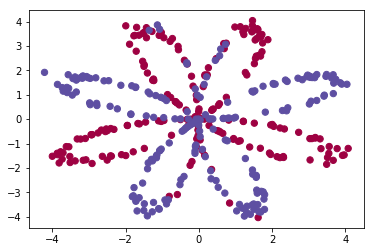

In [142]:
X, Y = load_planar_dataset()
plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y) ,s=40, cmap=plt.cm.Spectral);

In [112]:
np.squeeze(Y).shape

(400,)

In [113]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

C:\Users\VIBIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


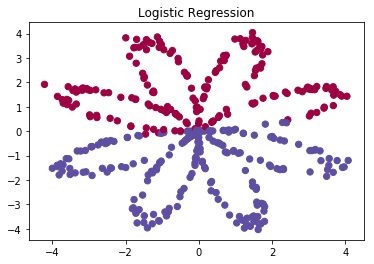

In [114]:



plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
plt.scatter(X[0, :], X[1, :], c=np.squeeze(LR_predictions) ,s=40, cmap=plt.cm.Spectral);
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [115]:
w = np.zeros(shape=(2,1), dtype = np.float32)
b = 0

In [116]:
def propagate(w,b,X,Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1. / m) * np.sum((Y*np.log(A) + (1 - Y)*np.log(1-A)), axis=1)
    dw = (1./m)*np.dot(X,((A-Y).T))
    db = (1./m)*np.sum(A-Y, axis = 1)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    return grads, cost

In [117]:
costs = []
    
for i in range(300):
    grads, cost = propagate(w, b, X, Y)
    db = grads["db"]
    dw = grads["dw"]
        
    w = w - .01*dw
    b = b - .01*db
        
    if i % 100 == 0:
        costs.append(cost)
            
    if i % 100 == 0:
        print("Cost after iteration %i: %f" %(i, cost))
        
params = {"w": w,
          "b": b}
grads = {"dw": dw,
         "db": db}

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.676045
Cost after iteration 200: 0.673605


In [118]:
def predict(w, b, X):
    Y_prediction = np.zeros((1,X.shape[1]))
    
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        if A[0,i] >= 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
    assert(Y_prediction.shape == (1,X.shape[1]))
    
    return Y_prediction

In [119]:
Y_prediction=predict(params["w"], params["b"], X)

Accuracy: 90%


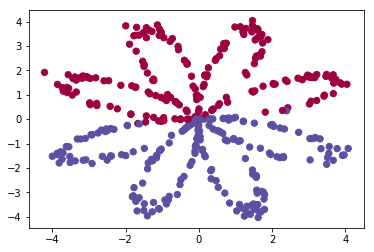

In [120]:
plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y_prediction) ,s=40, cmap=plt.cm.Spectral);

print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

In [80]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return n_x, n_h, n_y
    

In [97]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1) )
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    
    
    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2}
    return parameters

In [99]:
def forward_propagation(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

In [86]:
def compute_cost(A2, Y, parameters):
    """
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost 
    """
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1-A2), 1-Y)
    cost = - 1/m * np.sum(logprobs)
    
    cost = np.squeeze(cost)
    return cost

In [102]:
def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) * np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T,dZ2),(1 - np.power(A1,2)))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis = 1,keepdims = True)
    
    grads = {"dW2": dW2,
             "db2": db2,
             "db1": db1,
             "dW1": dW1}
    return grads

In [89]:
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2}
    
    return parameters

In [104]:
def nn_model(X, Y, n_h, num_iterations, print_cost):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
        
        A2, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A2, Y, parameters)
        
        grads = backward_propagation(parameters, cache, X, Y)
        
        parameters = update_parameters(parameters, grads, 1.2)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [127]:
def predict(parameters, X):
    A2, cache = forward_propagation(X,parameters)
    predictions = (A2 > 0.5)
    
    return predictions

Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219471
Cost after iteration 9000: 0.218562


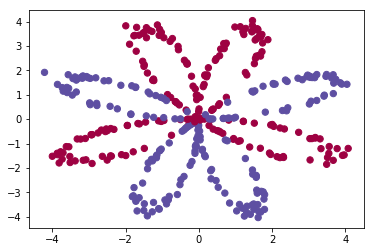

In [143]:
parameters = nn_model(X, Y, n_h=4, num_iterations=10000, print_cost=True)
y_predict = predict(parameters, X)
plt.scatter(X[0, :], X[1, :], c=np.squeeze(y_predict) ,s=40, cmap=plt.cm.Spectral)


Cost after iteration 0: 0.693148
Cost after iteration 1000: 0.636621
Cost after iteration 2000: 0.634757
Cost after iteration 3000: 0.633814
Cost after iteration 4000: 0.633205
Accuracy for 1 hidden units: 67.5 %
Cost after iteration 0: 0.693116
Cost after iteration 1000: 0.582325
Cost after iteration 2000: 0.578948
Cost after iteration 3000: 0.577291
Cost after iteration 4000: 0.576190
Accuracy for 2 hidden units: 67.25 %
Cost after iteration 0: 0.693114
Cost after iteration 1000: 0.285502
Cost after iteration 2000: 0.273063
Cost after iteration 3000: 0.266367
Cost after iteration 4000: 0.262067
Accuracy for 3 hidden units: 90.75 %
Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Accuracy for 4 hidden units: 90.5 %
Cost after iteration 0: 0.693252
Cost after iteration 1000: 0.283771
Cost after iteration 2000: 0.270689
Cost after iteration 3000: 0.263510
Cost 

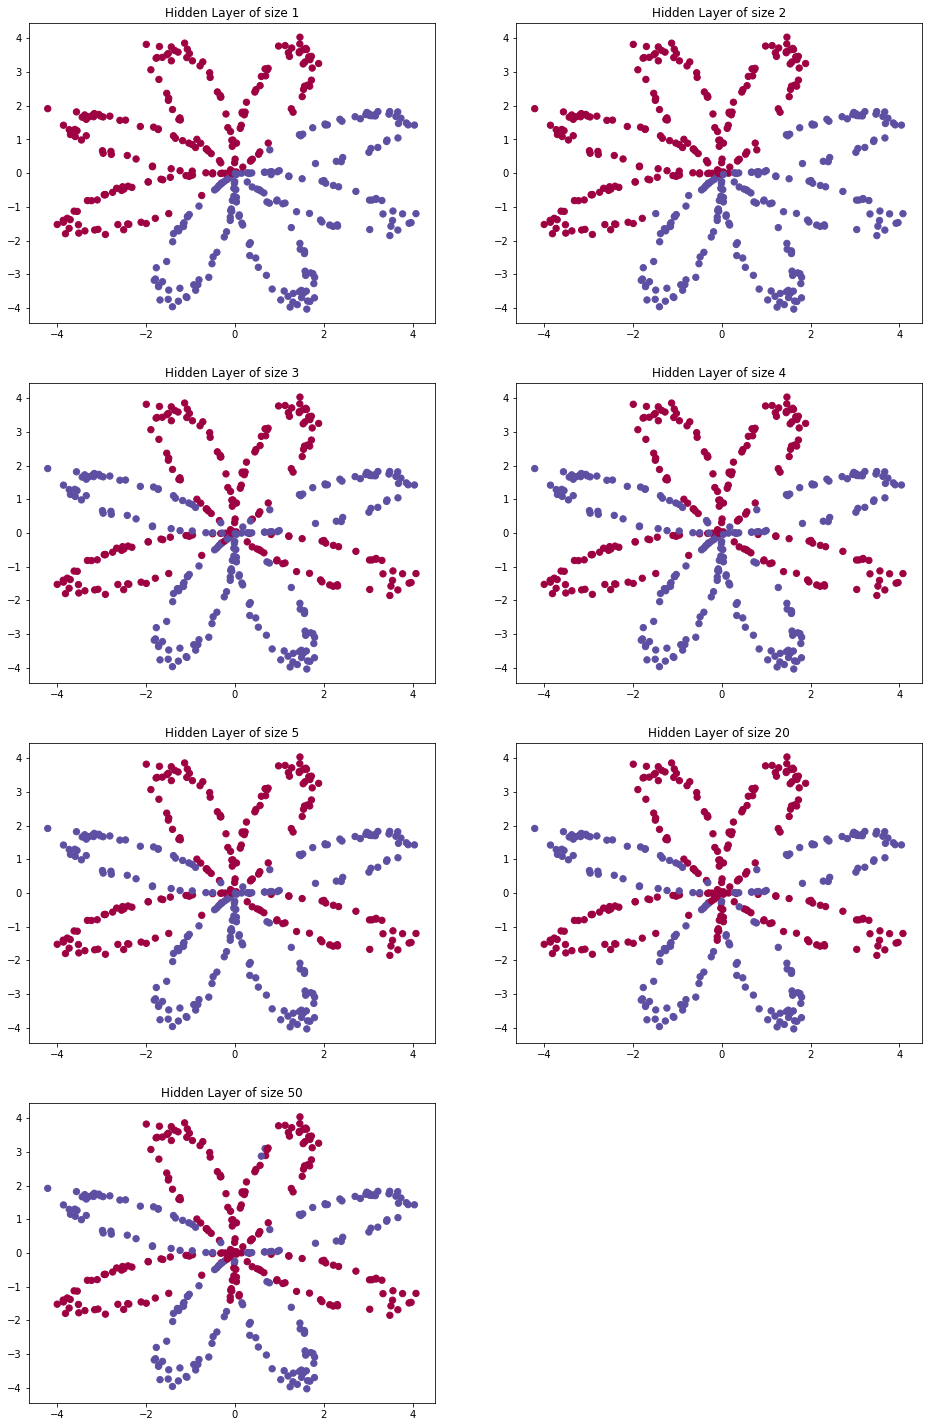

In [129]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000, print_cost=True)
    
    predictions = predict(parameters, X)
    plt.scatter(X[0, :], X[1, :], c=np.squeeze(predictions) ,s=40, cmap=plt.cm.Spectral)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

Cost after iteration 0: 0.693146
Cost after iteration 1000: 0.423984
Cost after iteration 2000: 0.418646
Cost after iteration 3000: 0.416476
Cost after iteration 4000: 0.416619
Cost after iteration 5000: 0.415274
Cost after iteration 6000: 0.414237
Cost after iteration 7000: 0.413234
Cost after iteration 8000: 0.412315
Cost after iteration 9000: 0.411729


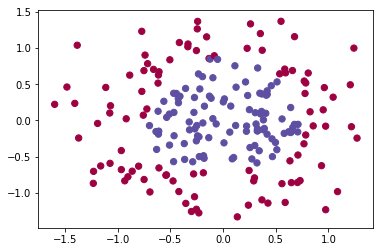

In [145]:

noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

dataset = "noisy_circles"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2
parameters = nn_model(X, Y, n_h=4, num_iterations=10000, print_cost=True)
y_predict = predict(parameters, X)
plt.scatter(X[0, :], X[1, :], c=np.squeeze(y_predict) ,s=40, cmap=plt.cm.Spectral)


C:\Users\VIBIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
C:\Users\VIBIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':
C:\Users\VIBIN\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\Users\VIBIN\Desktop\practice\computer-vision\planar_utils.py:32: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


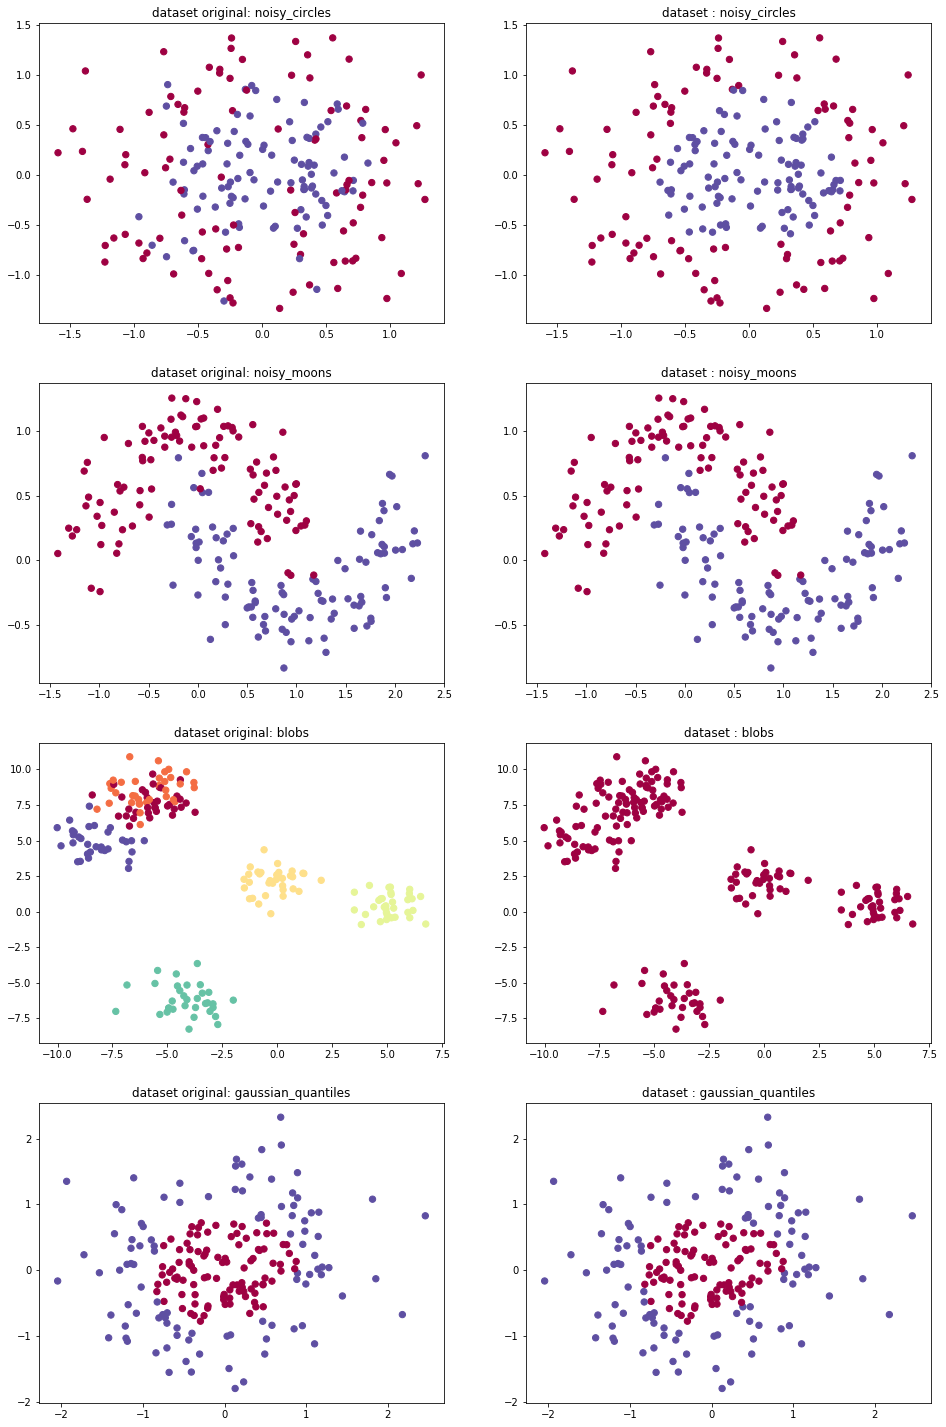

In [161]:
plt.figure(figsize=(16, 32))
j= 0
for  i in datasets:
    plt.subplot(5, 2, j+1)
    plt.title('dataset original: ' + str(i))
    X, Y = datasets[i]
    X, Y = X.T, Y.reshape(1, Y.shape[0])
    j=j+1
    plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y) ,s=40, cmap=plt.cm.Spectral)
    # make blobs binary
    if dataset == "blobs":
        Y = Y%2
    parameters = nn_model(X, Y, n_h=4, num_iterations=10000, print_cost=False)
    y_predict = predict(parameters, X)
    plt.subplot(5, 2, j+1)
    plt.title('dataset : ' + str(i))
    j=j+1
    plt.scatter(X[0, :], X[1, :], c=np.squeeze(y_predict) ,s=40, cmap=plt.cm.Spectral)
    